In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [52]:
data1 = {
    "Age": ["<=30","<=30","31...40",">40",">40",">40","31...40","<=30","<=30",">40","<=30","31...40","31...40",">40"],
    "Income": ["High","High","High","Medium","Low","Low","Low","Medium","Low","Medium","Medium","Medium","High","Medium"],
    "Student": ["No","No","No","No","Yes","Yes","Yes","No","Yes","Yes","Yes","No","Yes","No"],
    "Credit_rating": ["Fair","Excellent","Fair","Fair","Fair","Excellent","Excellent","Fair","Fair","Fair","Excellent","Excellent","Fair","Excellent"],
    "Buys_computer": ["No","No","Yes","Yes","Yes","No","Yes","No","Yes","Yes","Yes","Yes","Yes","No"]
}

df1 = pd.DataFrame(data1)

print("\n Dataset-1")
print(df1.head())



 Dataset-1
       Age  Income Student Credit_rating Buys_computer
0     <=30    High      No          Fair            No
1     <=30    High      No     Excellent            No
2  31...40    High      No          Fair           Yes
3      >40  Medium      No          Fair           Yes
4      >40     Low     Yes          Fair           Yes


In [54]:
le = LabelEncoder()
for col in df1.columns:
    df1[col] = le.fit_transform(df1[col])

print("\n Encoded Dataset-1 ")
print(df1)



 Encoded Dataset-1 
    Age  Income  Student  Credit_rating  Buys_computer
0     1       0        0              1              0
1     1       0        0              0              0
2     0       0        0              1              1
3     2       2        0              1              1
4     2       1        1              1              1
5     2       1        1              0              0
6     0       1        1              0              1
7     1       2        0              1              0
8     1       1        1              1              1
9     2       2        1              1              1
10    1       2        1              0              1
11    0       2        0              0              1
12    0       0        1              1              1
13    2       2        0              0              0


In [32]:
X1 = df1.drop("Buys_computer", axis=1)
y1 = df1["Buys_computer"]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)


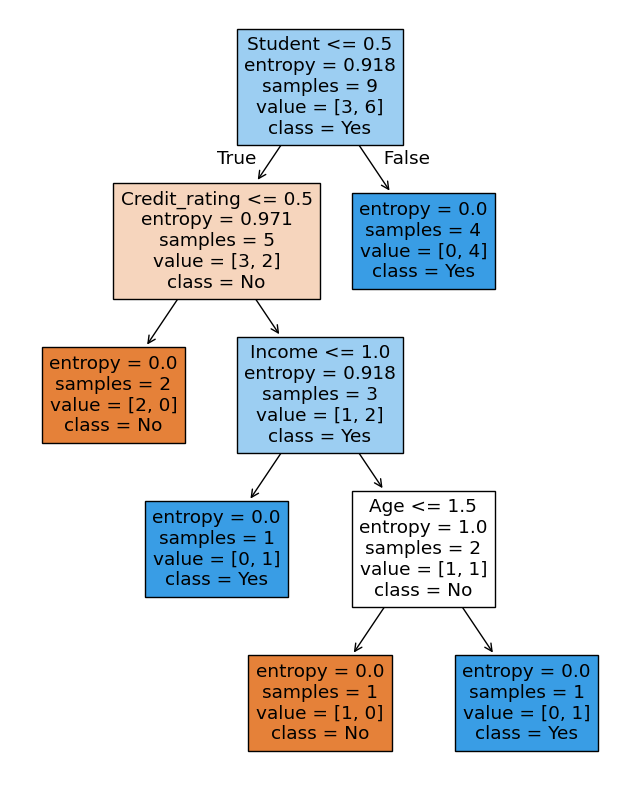

In [56]:

clf1 = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf1.fit(X1_train, y1_train)

plt.figure(figsize=(8,10))
plot_tree(clf1, feature_names=X1.columns, class_names=["No","Yes"], filled=True)
plt.show()



In [40]:

y1_pred = clf1.predict(X1_test)
print("\n--- Actual vs Predicted (Dataset-1) ---")
results = pd.DataFrame({
    "Actual": y1_test.values,
    "Predicted": y1_pred
})
print(results)
print("\n--- Model Accuracy (Dataset-1) ---")
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("\nClassification Report:\n", classification_report(y1_test, y1_pred))



--- Actual vs Predicted (Dataset-1) ---
   Actual  Predicted
0       1          1
1       1          0
2       0          1
3       1          1
4       0          1

--- Model Accuracy (Dataset-1) ---
Accuracy: 0.4

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.67      0.57         3

    accuracy                           0.40         5
   macro avg       0.25      0.33      0.29         5
weighted avg       0.30      0.40      0.34         5



In [42]:
data2 = {
    "CustomerID": list(range(1,51)),
    "Gender": ["Male","Female","Male","Female","Male","Female","Male","Female","Male","Female",
               "Male","Female","Male","Female","Male","Female","Male","Female","Male","Female",
               "Male","Female","Male","Female","Male","Female","Male","Female","Male","Female",
               "Male","Female","Male","Female","Male","Female","Male","Female","Male","Female",
               "Male","Female","Male","Female","Male","Female","Male","Female","Male","Female"],
    "CarType": ["Sedan","Hatchback","SUV","Sedan","Hatchback","SUV","Sedan","Hatchback","SUV","Sedan",
                "Hatchback","SUV","Sedan","Hatchback","SUV","Sedan","Hatchback","SUV","Sedan","Hatchback",
                "SUV","Sedan","Hatchback","SUV","Sedan","Hatchback","SUV","Sedan","Hatchback","SUV",
                "Sedan","Hatchback","SUV","Sedan","Hatchback","SUV","Sedan","Hatchback","SUV","Sedan",
                "Hatchback","SUV","Sedan","Hatchback","SUV","Sedan","Hatchback","SUV","Sedan","Hatchback"],
    "ShirtSize": ["M","L","XL","S","M","L","XL","S","M","L",
                  "XL","S","M","L","XL","S","M","L","XL","S",
                  "M","L","XL","S","M","L","XL","S","M","L",
                  "XL","S","M","L","XL","S","M","L","XL","S",
                  "M","L","XL","S","M","L","XL","S","M","L"],
    "Class": ["C0","C1","C0","C1","C1","C0","C1","C0","C1","C0",
              "C0","C1","C1","C0","C0","C1","C1","C0","C1","C0",
              "C0","C1","C1","C0","C1","C0","C1","C0","C0","C1",
              "C0","C1","C1","C0","C1","C0","C0","C1","C0","C1",
              "C1","C0","C1","C0","C0","C1","C1","C0","C1","C0"]
}

df2 = pd.DataFrame(data2)

print("\n Dataset-2 ")
print(df2.head())



 Dataset-2 
   CustomerID  Gender    CarType ShirtSize Class
0           1    Male      Sedan         M    C0
1           2  Female  Hatchback         L    C1
2           3    Male        SUV        XL    C0
3           4  Female      Sedan         S    C1
4           5    Male  Hatchback         M    C1


In [44]:

df2_encoded = df2.copy()
for col in ["Gender","CarType","ShirtSize","Class"]:
    df2_encoded[col] = LabelEncoder().fit_transform(df2_encoded[col])

print("\n Encoded Dataset-1 ")
print(df1)



 Encoded Dataset-1 
    Age  Income  Student  Credit_rating  Buys_computer
0     1       0        0              1              0
1     1       0        0              0              0
2     0       0        0              1              1
3     2       2        0              1              1
4     2       1        1              1              1
5     2       1        1              0              0
6     0       1        1              0              1
7     1       2        0              1              0
8     1       1        1              1              1
9     2       2        1              1              1
10    1       2        1              0              1
11    0       2        0              0              1
12    0       0        1              1              1
13    2       2        0              0              0


In [46]:

X2 = df2_encoded.drop(["CustomerID","Class"], axis=1)
y2 = df2_encoded["Class"]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)


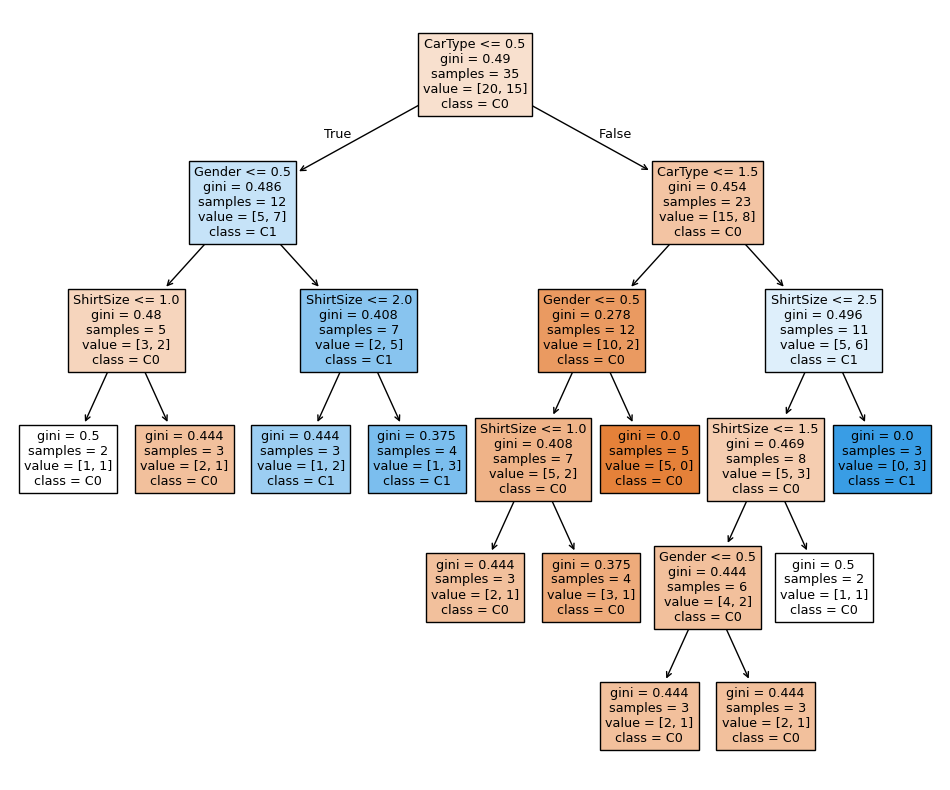

In [48]:
clf2 = DecisionTreeClassifier(criterion="gini", random_state=42)
clf2.fit(X2_train, y2_train)

plt.figure(figsize=(12,10))
plot_tree(clf2, feature_names=X2.columns, class_names=["C0","C1"], filled=True)
plt.show()

In [50]:
# Predictions on Dataset-2
y2_pred = clf2.predict(X2_test)

print("\n--- Actual vs Predicted (Dataset-2) ---")
results2 = pd.DataFrame({
    "Actual": y2_test.values,
    "Predicted": y2_pred
})
print(results2)

# Evaluate again
print("\nAccuracy:", accuracy_score(y2_test, y2_pred))



--- Actual vs Predicted (Dataset-2) ---
    Actual  Predicted
0        0          0
1        1          0
2        0          1
3        1          0
4        0          0
5        1          0
6        1          0
7        0          0
8        1          0
9        0          0
10       1          0
11       1          1
12       1          0
13       1          0
14       1          0

Accuracy: 0.3333333333333333
